In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.drop(['availability','society','balcony'],axis=1,inplace=True)

In [4]:
df

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [5]:
df.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [6]:
df["size"].value_counts()
df['size'].fillna(('2 BHK'),inplace=True)
df['size'].isna().sum()

0

In [7]:
df.corr()

,bath,price
bath,1.000000,0.456345
price,0.456345,1.000000


In [8]:
df["bath"].value_counts()
df["bath"].fillna(('2.0'),inplace=True)
df["bath"].isna().sum()

0

In [9]:
df['location'].value_counts()

# df['location'].fillna(('Alandi Road'),inplace=True)
df['location'].isna().sum()

1

In [10]:
df.isna().sum()

area_type     0
location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [12]:
df=pd.get_dummies(df,columns=["area_type"])

In [13]:
df

,location,size,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,0,0,0,1
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,0,0,1,0
2,Uttarahalli,3 BHK,1440,2.0,62.00,1,0,0,0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,0,0,0,1
4,Kothanur,2 BHK,1200,2.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,1,0,0,0
13316,Richards Town,4 BHK,3600,5.0,400.00,0,0,0,1
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,1,0,0,0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,0,0,0,1


In [14]:
df['bhk']=df['size'].apply(lambda x : x.split()[0]).astype(int)
df['bhk']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: bhk, Length: 13320, dtype: int32

In [15]:
df.drop('size',axis=1,inplace=True)
df

,location,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,Electronic City Phase II,1056,2.0,39.07,0,0,0,1,2
1,Chikka Tirupathi,2600,5.0,120.00,0,0,1,0,4
2,Uttarahalli,1440,2.0,62.00,1,0,0,0,3
3,Lingadheeranahalli,1521,3.0,95.00,0,0,0,1,3
4,Kothanur,1200,2.0,51.00,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,1,0,0,0,5
13316,Richards Town,3600,5.0,400.00,0,0,0,1,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,1,0,0,0,2
13318,Padmanabhanagar,4689,4.0,488.00,0,0,0,1,4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   location                        13319 non-null  object 
 1   total_sqft                      13320 non-null  object 
 2   bath                            13320 non-null  object 
 3   price                           13320 non-null  float64
 4   area_type_Built-up  Area        13320 non-null  uint8  
 5   area_type_Carpet  Area          13320 non-null  uint8  
 6   area_type_Plot  Area            13320 non-null  uint8  
 7   area_type_Super built-up  Area  13320 non-null  uint8  
 8   bhk                             13320 non-null  int32  
dtypes: float64(1), int32(1), object(3), uint8(4)
memory usage: 520.4+ KB


In [17]:
df['total_sqft'].isna().sum()

0

In [18]:
df['total_sqft'].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [19]:
df["total_sqft"]=df["total_sqft"].fillna("2550.0")
df["total_sqft"].isna().sum()

0

In [20]:
def convert_sqft (x):
    num = x.split('-')
    if len(num) == 2:
        return (float(num[0])+float(num[1]))/2
    try:
        return float(x)
    except:
        return None

In [21]:
df.isna().sum()

location                          1
total_sqft                        0
bath                              0
price                             0
area_type_Built-up  Area          0
area_type_Carpet  Area            0
area_type_Plot  Area              0
area_type_Super built-up  Area    0
bhk                               0
dtype: int64

In [22]:
df['total_sqft']=df['total_sqft'].apply(convert_sqft)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   location                        13319 non-null  object 
 1   total_sqft                      13274 non-null  float64
 2   bath                            13320 non-null  object 
 3   price                           13320 non-null  float64
 4   area_type_Built-up  Area        13320 non-null  uint8  
 5   area_type_Carpet  Area          13320 non-null  uint8  
 6   area_type_Plot  Area            13320 non-null  uint8  
 7   area_type_Super built-up  Area  13320 non-null  uint8  
 8   bhk                             13320 non-null  int32  
dtypes: float64(2), int32(1), object(2), uint8(4)
memory usage: 520.4+ KB


In [24]:
df['bath']=df['bath'].apply(float)
df['bath']

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   location                        13319 non-null  object 
 1   total_sqft                      13274 non-null  float64
 2   bath                            13320 non-null  float64
 3   price                           13320 non-null  float64
 4   area_type_Built-up  Area        13320 non-null  uint8  
 5   area_type_Carpet  Area          13320 non-null  uint8  
 6   area_type_Plot  Area            13320 non-null  uint8  
 7   area_type_Super built-up  Area  13320 non-null  uint8  
 8   bhk                             13320 non-null  int32  
dtypes: float64(3), int32(1), object(1), uint8(4)
memory usage: 520.4+ KB


In [26]:
df['location'].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [27]:
df

,location,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,0,0,0,1,2
1,Chikka Tirupathi,2600.0,5.0,120.00,0,0,1,0,4
2,Uttarahalli,1440.0,2.0,62.00,1,0,0,0,3
3,Lingadheeranahalli,1521.0,3.0,95.00,0,0,0,1,3
4,Kothanur,1200.0,2.0,51.00,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,1,0,0,0,5
13316,Richards Town,3600.0,5.0,400.00,0,0,0,1,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,1,0,0,0,2
13318,Padmanabhanagar,4689.0,4.0,488.00,0,0,0,1,4


## Treating Outliers


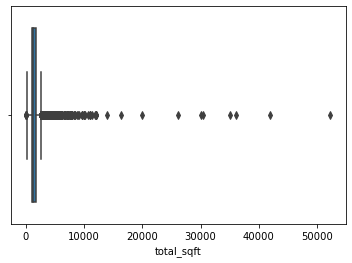

In [28]:
sns.boxplot(x=df["total_sqft"])
plt.show()


In [29]:
q1=df["total_sqft"].quantile(0.25)
q3=df["total_sqft"].quantile(0.75)
print(q1)
print(q3)


1100.0
1680.0


In [30]:
IQR=q3-q1
IQR

580.0

In [31]:
lower_limit=q1-(IQR*1.5)
upper_limit=q3+(IQR*1.5)
print(lower_limit,upper_limit)

230.0 2550.0


In [32]:
df[(df["total_sqft"]>2550) |(df["total_sqft"]<230)]

,location,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
1,Chikka Tirupathi,2600.0,5.0,120.0,0,0,1,0,4
6,Old Airport Road,2732.0,4.0,204.0,0,0,0,1,4
7,Rajaji Nagar,3300.0,4.0,600.0,0,0,0,1,4
11,Whitefield,2785.0,5.0,295.0,0,0,1,0,4
18,Ramakrishnappa Layout,2770.0,4.0,290.0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...
13290,Sarjapur Road,4050.0,2.0,450.0,0,0,0,1,4
13299,Whitefield,2856.0,5.0,154.5,0,0,0,1,4
13315,Whitefield,3453.0,4.0,231.0,1,0,0,0,5
13316,Richards Town,3600.0,5.0,400.0,0,0,0,1,4


In [33]:
#df['total_sqft'].median()
#df['total_sqft']=df[['total_sqft']].loc[(df['total_sqft'] < upper_limit) | (df['total_sqft'] > lower_limit)].median()[0]

In [34]:
df.loc[df['total_sqft']> upper_limit,'total_sqft']=upper_limit
df.loc[df['total_sqft']> upper_limit,'total_sqft']
df.loc[df['total_sqft']< lower_limit,'total_sqft']=lower_limit

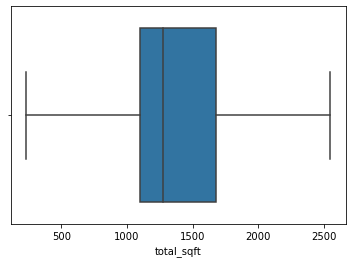

In [35]:
sns.boxplot(x=df["total_sqft"])
plt.show()

In [36]:
df["total_sqft"]

0        1056.0
1        2550.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    2550.0
13316    2550.0
13317    1141.0
13318    2550.0
13319     550.0
Name: total_sqft, Length: 13320, dtype: float64

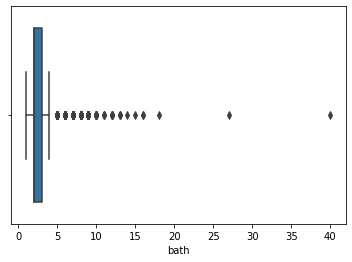

In [37]:
sns.boxplot(x=df["bath"])
plt.show()


In [38]:
from feature_engine.outliers import Winsorizer

In [39]:
from feature_engine.outliers import Winsorizer
win=Winsorizer(capping_method='iqr',tail='right',fold=1.5,variables=("bath"))
df_win=win.fit_transform(df[['bath']])
df["bath"]=df_win

In [40]:
print(win.left_tail_caps_,win.right_tail_caps_)

{} {'bath': 4.5}


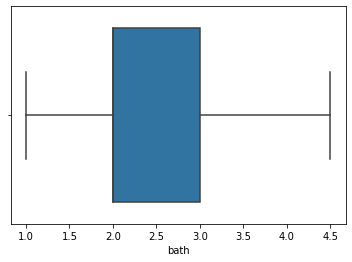

In [41]:
sns.boxplot(x=df["bath"])
plt.show()

In [42]:
win=win=Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=("price"))
df_win=win.fit_transform(df[['price']])
df["price"]= df_win


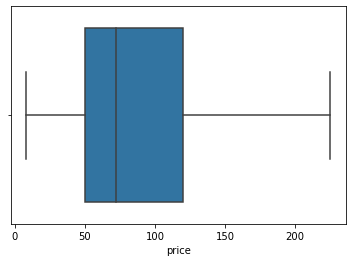

In [43]:
sns.boxplot(x=df["price"])
plt.show()

In [44]:
print(win.left_tail_caps_,win.right_tail_caps_)

{'price': -55.0} {'price': 225.0}


In [45]:
df

,location,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,0,0,0,1,2
1,Chikka Tirupathi,2550.0,4.5,120.00,0,0,1,0,4
2,Uttarahalli,1440.0,2.0,62.00,1,0,0,0,3
3,Lingadheeranahalli,1521.0,3.0,95.00,0,0,0,1,3
4,Kothanur,1200.0,2.0,51.00,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...
13315,Whitefield,2550.0,4.0,225.00,1,0,0,0,5
13316,Richards Town,2550.0,4.5,225.00,0,0,0,1,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,1,0,0,0,2
13318,Padmanabhanagar,2550.0,4.0,225.00,0,0,0,1,4


In [46]:
df.describe()

,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,1430.065379,2.566629,93.334921,0.181532,0.006532,0.152027,0.659910,2.802778
std,527.023256,0.916808,59.709180,0.385472,0.080557,0.359061,0.473757,1.294496
min,230.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1100.000000,2.000000,50.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1276.000000,2.000000,72.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,1680.000000,3.000000,120.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,2550.000000,4.500000,225.000000,1.000000,1.000000,1.000000,1.000000,43.000000


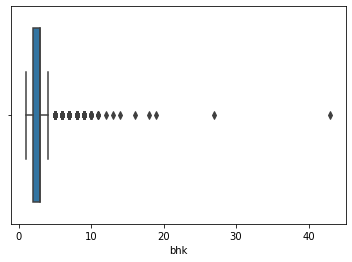

In [47]:
sns.boxplot(x=df["bhk"])
plt.show()

In [48]:
win=Winsorizer(capping_method='iqr',tail='right',fold=1.5,variables=("bhk"))
df_win=win.fit_transform(df[['bhk']])
df["bhk"]=df_win

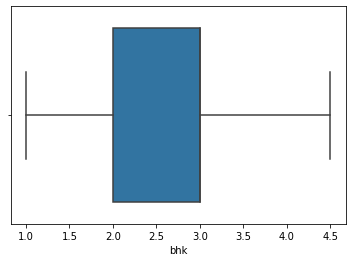

In [49]:
sns.boxplot(x=df["bhk"])
plt.show()

In [50]:
print(win.left_tail_caps_,win.right_tail_caps_)

{} {'bhk': 4.5}


In [51]:
df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [52]:

# df['location'] = df['location'].apply(lambda x : x.strip())
location_count=df['location'].value_counts()
locationless50 = location_count[location_count<=50]
locationless50
df['location'] = df['location'].apply(lambda x :'other' if x in locationless50 else x)


df['location'].value_counts()

other                       7249
Whitefield                   540
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
Yelahanka                    213
Uttarahalli                  186
Hebbal                       177
Marathahalli                 175
Raja Rajeshwari Nagar        171
Hennur Road                  152
Bannerghatta Road            152
7th Phase JP Nagar           149
Haralur Road                 142
Electronic City Phase II     132
Rajaji Nagar                 107
Chandapura                   100
Bellandur                     96
KR Puram                      91
Electronics City Phase 1      88
Hoodi                         88
Yeshwanthpur                  85
Begur Road                    84
Sarjapur                      82
Kasavanhalli                  80
Harlur                        79
Banashankari                  75
Hormavu                       74
Kengeri                       73
Ramamurthy

In [53]:
df['location']

0        Electronic City Phase II
1                           other
2                     Uttarahalli
3                           other
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318                       other
13319                       other
Name: location, Length: 13320, dtype: object

In [54]:
df.describe()

,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,1430.065379,2.566629,93.334921,0.181532,0.006532,0.152027,0.659910,2.686937
std,527.023256,0.916808,59.709180,0.385472,0.080557,0.359061,0.473757,0.874385
min,230.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1100.000000,2.000000,50.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,1276.000000,2.000000,72.000000,0.000000,0.000000,0.000000,1.000000,3.000000
75%,1680.000000,3.000000,120.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,2550.000000,4.500000,225.000000,1.000000,1.000000,1.000000,1.000000,4.500000


In [55]:
df=pd.get_dummies(df,columns=["location"])

In [56]:
df

,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,location_7th Phase JP Nagar,location_8th Phase JP Nagar,...,location_Sarjapur Road,location_TC Palaya,location_Thanisandra,location_Thigalarapalya,location_Uttarahalli,location_Varthur,location_Whitefield,location_Yelahanka,location_Yeshwanthpur,location_other
0,1056.0,2.0,39.07,0,0,0,1,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2550.0,4.5,120.00,0,0,1,0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1440.0,2.0,62.00,1,0,0,0,3.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1521.0,3.0,95.00,0,0,0,1,3.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1200.0,2.0,51.00,0,0,0,1,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,2550.0,4.0,225.00,1,0,0,0,4.5,0,0,...,0,0,0,0,0,0,1,0,0,0
13316,2550.0,4.5,225.00,0,0,0,1,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1
13317,1141.0,2.0,60.00,1,0,0,0,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,2550.0,4.0,225.00,0,0,0,1,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 62 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   total_sqft                         13274 non-null  float64
 1   bath                               13320 non-null  float64
 2   price                              13320 non-null  float64
 3   area_type_Built-up  Area           13320 non-null  uint8  
 4   area_type_Carpet  Area             13320 non-null  uint8  
 5   area_type_Plot  Area               13320 non-null  uint8  
 6   area_type_Super built-up  Area     13320 non-null  uint8  
 7   bhk                                13320 non-null  float64
 8   location_7th Phase JP Nagar        13320 non-null  uint8  
 9   location_8th Phase JP Nagar        13320 non-null  uint8  
 10  location_Akshaya Nagar             13320 non-null  uint8  
 11  location_Banashankari              13320 non-null  uin

In [58]:
df.isna().sum().head(10)

total_sqft                        46
bath                               0
price                              0
area_type_Built-up  Area           0
area_type_Carpet  Area             0
area_type_Plot  Area               0
area_type_Super built-up  Area     0
bhk                                0
location_7th Phase JP Nagar        0
location_8th Phase JP Nagar        0
dtype: int64

In [59]:
df=df.dropna()

In [60]:
df.isna().sum()

total_sqft                  0
bath                        0
price                       0
area_type_Built-up  Area    0
area_type_Carpet  Area      0
                           ..
location_Varthur            0
location_Whitefield         0
location_Yelahanka          0
location_Yeshwanthpur       0
location_other              0
Length: 62, dtype: int64

In [61]:
X=df.drop(columns="price")
y=df['price']

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [63]:
model=LinearRegression()
model

LinearRegression()

In [64]:
model.fit(X_train,y_train)

LinearRegression()

In [65]:
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [66]:
model.score(X_train,y_train)


0.7260878427681439

In [67]:
model.score(X_test,y_test)

0.7323101650526606

## Testing on Single Row

In [68]:
column_names=X.columns
len(column_names)


61

In [69]:
df.head()

,total_sqft,bath,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,bhk,location_7th Phase JP Nagar,location_8th Phase JP Nagar,...,location_Sarjapur Road,location_TC Palaya,location_Thanisandra,location_Thigalarapalya,location_Uttarahalli,location_Varthur,location_Whitefield,location_Yelahanka,location_Yeshwanthpur,location_other
0,1056.0,2.0,39.07,0,0,0,1,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2550.0,4.5,120.00,0,0,1,0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1440.0,2.0,62.00,1,0,0,0,3.0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1521.0,3.0,95.00,0,0,0,1,3.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1200.0,2.0,51.00,0,0,0,1,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
total_sqft=900
bath=3
bhk=4
area_type= "Built-up  Area"
location="Thanisandra"



In [71]:
area_type_col= "area_type_"+ area_type
print(area_type_col)
site_location_col="location_"+ location


area_type_Built-up  Area


In [72]:
column_names

Index(['total_sqft', 'bath', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'bhk', 'location_7th Phase JP Nagar',
       'location_8th Phase JP Nagar', 'location_Akshaya Nagar',
       'location_Banashankari', 'location_Bannerghatta Road',
       'location_Begur Road', 'location_Bellandur', 'location_Bisuvanahalli',
       'location_Budigere', 'location_Chandapura', 'location_Electronic City',
       'location_Electronic City Phase II',
       'location_Electronics City Phase 1', 'location_HSR Layout',
       'location_Haralur Road', 'location_Harlur', 'location_Hebbal',
       'location_Hennur', 'location_Hennur Road', 'location_Hoodi',
       'location_Hormavu', 'location_Hosa Road', 'location_Hulimavu',
       'location_JP Nagar', 'location_Jakkur', 'location_Jalahalli',
       'location_Jigani', 'location_KR Puram', 'location_Kaggadasapura',
       'location_Kanakpura Road', 'location_Kasavanhalli', 'loc

In [73]:
area_type_index=np.where(column_names==area_type_col)[0]
site_location_index=np.where(column_names==site_location_col)[0][0]
print(site_location_index)
print(area_type_index)

53
[2]


In [74]:
array=np.zeros(len(column_names),dtype=int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [75]:
array[0]=total_sqft
array[1]=bath
array[2]=bhk
array[area_type_index]=1
array[site_location_index]=1
array

array([900,   3,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0,   0,   0,   0,   0,   0])

In [76]:
predicted_price=model.predict([array])[0]
# print(,predicted_price)
print("predicted_price is:",np.around(predicted_price, 2))


predicted_price is: 52.4


C:\Users\SIR\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [77]:
import pickle

with open("Bangalore_dataset.pkl", "wb") as f:
    pickle.dump(model, f)

In [78]:
project_data = {"columns":list(column_names)}
project_data

{'columns': ['total_sqft',
  'bath',
  'area_type_Built-up  Area',
  'area_type_Carpet  Area',
  'area_type_Plot  Area',
  'area_type_Super built-up  Area',
  'bhk',
  'location_7th Phase JP Nagar',
  'location_8th Phase JP Nagar',
  'location_Akshaya Nagar',
  'location_Banashankari',
  'location_Bannerghatta Road',
  'location_Begur Road',
  'location_Bellandur',
  'location_Bisuvanahalli',
  'location_Budigere',
  'location_Chandapura',
  'location_Electronic City',
  'location_Electronic City Phase II',
  'location_Electronics City Phase 1',
  'location_HSR Layout',
  'location_Haralur Road',
  'location_Harlur',
  'location_Hebbal',
  'location_Hennur',
  'location_Hennur Road',
  'location_Hoodi',
  'location_Hormavu',
  'location_Hosa Road',
  'location_Hulimavu',
  'location_JP Nagar',
  'location_Jakkur',
  'location_Jalahalli',
  'location_Jigani',
  'location_KR Puram',
  'location_Kaggadasapura',
  'location_Kanakpura Road',
  'location_Kasavanhalli',
  'location_Kengeri',


In [79]:
import json

with open("Bangalore_datasetJSON.json","w") as f:
    json.dump(project_data, f)